# Import Package

In [ ]:
# Import libraries
!pip install google_play_scraper Sastrawi imblearn

import pandas as pd
import numpy as np
import re
import string
from google_play_scraper import reviews_all, Sort
from google.colab import files
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# Step 1: Fetch Reviews
reviews_sd = reviews_all(
    'com.gamatechno.solodestinationnew',
    sleep_milliseconds=0,
    lang='id',
    country='id',
    sort=Sort.MOST_RELEVANT
)

In [ ]:
reviews_sd

[{'reviewId': '7a25b84e-ff70-4dd4-aeb1-00e5df9f5b27',
  'userName': 'Habibie Alfath',
  'userImage': 'https://play-lh.googleusercontent.com/a-/ALV-UjWnlqXtflMwCObs0mdSUvDo1ylPSgYPy4eWtEWg1_-lm1LYq7W4',
  'content': 'Aplikasi ini memuat bebagai informasi destinasi wisata bagi yang ingin eksplor solo. Namun, karena solo ada banyak sekali pembangunan baru, aplikasi ini kurang up to date, bahkan beberapa tempat tutup tapi tidak diberi informasi buka atau tutupnya',
  'score': 3,
  'thumbsUpCount': 0,
  'reviewCreatedVersion': '1.227.151.5215',
  'at': datetime.datetime(2024, 9, 15, 15, 29, 13),
  'replyContent': None,
  'repliedAt': None,
  'appVersion': '1.227.151.5215'},
 {'reviewId': '2b1cff59-c232-4abb-ab73-d218db2cd3d0',
  'userName': 'Pengguna Google',
  'userImage': 'https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g',
  'content': 'Kelengkapan sudah cukup baik dan bisa ditingkatkan terus sesuai kebutuhan. Untuk r

In [ ]:
# Fetch Reviews
reviews_jaki = reviews_all(
    'id.go.jakarta.smartcity.jaki',
    sleep_milliseconds=0,
    lang='id',
    country='id',
    sort=Sort.MOST_RELEVANT
)

In [ ]:
reviews_jaki

[{'reviewId': 'f7deb878-348b-4097-9d77-eb77bb566e5d',
  'userName': 'Pengguna Google',
  'userImage': 'https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g',
  'content': 'Min, web/aplikasi alpukat tidak berguna sama sekali pengurusan akta anak baru lahir pas dateng kekelurahan harus bawa semua yang asli dan FC... itu sama saja ngurus manual. Hapus saja min sistem digitalisasinya tidak berguna sama sekali.',
  'score': 1,
  'thumbsUpCount': 2,
  'reviewCreatedVersion': '3.0.10',
  'at': datetime.datetime(2024, 11, 10, 10, 36, 2),
  'replyContent': 'Halo kak Ronni, mohon maaf atas kendala yang dialami. Mengenai keluhan dan kendala tersebut silahkan kakak bisa menjelaskan kronologi dan screenshoot permasalahan melalui email pengaduan kami di dki@jakarta.go.id agar dapat ditindaklanjuti. Terima kasih :) #LS',
  'repliedAt': datetime.datetime(2024, 11, 15, 3, 39, 58),
  'appVersion': '3.0.10'},
 {'reviewId': 'a0fa4085-ceba

In [ ]:
# Convert reviews to DataFrame
review_sd = pd.DataFrame(reviews_sd)
reviews_jaki = pd.DataFrame(reviews_jaki)

In [ ]:
review_sd

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,7a25b84e-ff70-4dd4-aeb1-00e5df9f5b27,Habibie Alfath,https://play-lh.googleusercontent.com/a-/ALV-U...,Aplikasi ini memuat bebagai informasi destinas...,3,0,1.227.151.5215,2024-09-15 15:29:13,None,NaT,1.227.151.5215
1,2b1cff59-c232-4abb-ab73-d218db2cd3d0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Kelengkapan sudah cukup baik dan bisa ditingka...,3,8,1.103.25.529,2018-12-17 16:38:31,None,NaT,1.103.25.529
2,07d141a5-13db-4833-a5b0-41b70911cbbf,Aul,https://play-lh.googleusercontent.com/a/ACg8oc...,"Di aplikasinya banyak opsi fitur bagus.., tapi...",4,0,None,2024-09-18 23:46:13,None,NaT,None
3,ba5604e6-3139-4876-948b-513a4975f5ac,Hari Utomo,https://play-lh.googleusercontent.com/a-/ALV-U...,"Saya lupa pasword dan user name di ulas, sy co...",1,0,1.227.151.5215,2024-11-27 05:03:37,None,NaT,1.227.151.5215
4,c1de0049-a0dd-48b8-9dfe-8c24e01d886a,Sri Kusmanto,https://play-lh.googleusercontent.com/a/ACg8oc...,Beberapa hari ini menu harga pangan selalu tid...,3,0,None,2022-05-08 23:35:40,None,NaT,None
...,...,...,...,...,...,...,...,...,...,...,...
219,22f9f229-92ff-4bdf-aec6-0345269579e0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Good Idea,5,0,None,2017-09-26 10:44:42,None,NaT,None
220,93b9451d-ce06-4a3c-9abe-a98b4a28996d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Sangat membantu,5,0,None,2017-08-26 02:00:23,None,NaT,None
221,57f0158e-299a-441b-b516-3d6a8ff41e78,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Bagus sekAli,5,0,None,2017-01-24 14:09:46,None,NaT,None
222,461aa4a1-869e-4142-94e6-1a13421a55dc,Raditya Yefta S,https://play-lh.googleusercontent.com/a-/ALV-U...,Asedap Santuyyyy,5,0,None,2020-10-01 01:12:34,None,NaT,None


In [ ]:
reviews_jaki

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,f7deb878-348b-4097-9d77-eb77bb566e5d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Min, web/aplikasi alpukat tidak berguna sama s...",1,2,3.0.10,2024-11-10 10:36:02,"Halo kak Ronni, mohon maaf atas kendala yang d...",2024-11-15 03:39:58,3.0.10
1,a0fa4085-ceba-4a07-a7d8-c21c4feb4ba9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Semenjak ada kode captha menjadi lebih sulit d...,2,1,3.0.10,2024-12-08 12:10:33,"Halo kak Febriyan palentino, Mohon maaf atas k...",2024-12-12 03:36:41,3.0.10
2,a1fd0e1c-2d94-4368-9649-89597f273db5,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasi kurang bagus.jln depan Rumah sudah se...,1,0,3.0.10,2024-12-17 13:24:43,"Halo Kak Rezki, untuk kendala yang kakak alami...",2024-12-20 06:01:07,3.0.10
3,e210788b-0f82-4e2b-b662-2b2f9b6ed4ed,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasi yg sangat bermanfaat.sy menggunakan a...,5,1,3.0.10,2024-12-04 21:28:23,"Hi Kak Ghaffa, Terima kasih atas ulasan positi...",2024-12-05 06:15:07,3.0.10
4,a24d978c-91eb-43dc-bd3b-c782d4db5e24,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Akhir akhir ini ngga bisa buat laporan, Selalu...",1,13,3.0.9,2024-10-03 01:16:34,"Halo Kak, untuk kendala yang kakak alami, kami...",2024-10-04 07:35:44,3.0.9
...,...,...,...,...,...,...,...,...,...,...,...
4509,6211cd65-1ae4-4bf2-a4ae-cb9a03c91599,Zaenal Abidin,https://play-lh.googleusercontent.com/a-/ALV-U...,Terimakasih...... 🙏🏻🙏🏻🙏🏻🙏🏻🙏🏻🙏🏻🙏🏻🙏🏻🙏🏻🙏🏻,5,0,None,2024-05-22 18:01:19,"Hi, Kak Zaenal Abidin. Terima kasih telah memb...",2024-05-29 06:58:33,None
4510,ee6e9da8-9e3b-4524-8880-990c9a4cb15f,Mung Dwi.p,https://play-lh.googleusercontent.com/a-/ALV-U...,Mantap 👍👍👍👍👍👍👍👍,5,0,None,2021-07-06 13:36:36,"Hi kak, Terima kasih atas ulasannya ya. Kami a...",2021-07-07 02:33:51,None
4511,4b4e6b14-c8b5-4eca-9c8f-31ed50f22e22,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Mantul.....,5,0,None,2020-03-10 15:41:31,None,NaT,None
4512,ca9b5ed7-4ceb-44b2-9372-1c8c4d1dfd42,Diyana Warnet,https://play-lh.googleusercontent.com/a/ACg8oc...,☺️☺️,5,0,1.1.34,2020-08-11 14:36:20,None,NaT,1.1.34


In [ ]:
# Concatenate the two dataframes
review_df = pd.concat([review_sd, reviews_jaki], ignore_index=True)
review_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,7a25b84e-ff70-4dd4-aeb1-00e5df9f5b27,Habibie Alfath,https://play-lh.googleusercontent.com/a-/ALV-U...,Aplikasi ini memuat bebagai informasi destinas...,3,0,1.227.151.5215,2024-09-15 15:29:13,None,NaT,1.227.151.5215
1,2b1cff59-c232-4abb-ab73-d218db2cd3d0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Kelengkapan sudah cukup baik dan bisa ditingka...,3,8,1.103.25.529,2018-12-17 16:38:31,None,NaT,1.103.25.529
2,07d141a5-13db-4833-a5b0-41b70911cbbf,Aul,https://play-lh.googleusercontent.com/a/ACg8oc...,"Di aplikasinya banyak opsi fitur bagus.., tapi...",4,0,None,2024-09-18 23:46:13,None,NaT,None
3,ba5604e6-3139-4876-948b-513a4975f5ac,Hari Utomo,https://play-lh.googleusercontent.com/a-/ALV-U...,"Saya lupa pasword dan user name di ulas, sy co...",1,0,1.227.151.5215,2024-11-27 05:03:37,None,NaT,1.227.151.5215
4,c1de0049-a0dd-48b8-9dfe-8c24e01d886a,Sri Kusmanto,https://play-lh.googleusercontent.com/a/ACg8oc...,Beberapa hari ini menu harga pangan selalu tid...,3,0,None,2022-05-08 23:35:40,None,NaT,None
...,...,...,...,...,...,...,...,...,...,...,...
4733,6211cd65-1ae4-4bf2-a4ae-cb9a03c91599,Zaenal Abidin,https://play-lh.googleusercontent.com/a-/ALV-U...,Terimakasih...... 🙏🏻🙏🏻🙏🏻🙏🏻🙏🏻🙏🏻🙏🏻🙏🏻🙏🏻🙏🏻,5,0,None,2024-05-22 18:01:19,"Hi, Kak Zaenal Abidin. Terima kasih telah memb...",2024-05-29 06:58:33,None
4734,ee6e9da8-9e3b-4524-8880-990c9a4cb15f,Mung Dwi.p,https://play-lh.googleusercontent.com/a-/ALV-U...,Mantap 👍👍👍👍👍👍👍👍,5,0,None,2021-07-06 13:36:36,"Hi kak, Terima kasih atas ulasannya ya. Kami a...",2021-07-07 02:33:51,None
4735,4b4e6b14-c8b5-4eca-9c8f-31ed50f22e22,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Mantul.....,5,0,None,2020-03-10 15:41:31,None,NaT,None
4736,ca9b5ed7-4ceb-44b2-9372-1c8c4d1dfd42,Diyana Warnet,https://play-lh.googleusercontent.com/a/ACg8oc...,☺️☺️,5,0,1.1.34,2020-08-11 14:36:20,None,NaT,1.1.34


In [ ]:
# Select the 'content' and 'score' columns
review_df = review_df[['content', 'score']]
review_df

,content,score
0,Aplikasi ini memuat bebagai informasi destinas...,3
1,Kelengkapan sudah cukup baik dan bisa ditingka...,3
2,"Di aplikasinya banyak opsi fitur bagus.., tapi...",4
3,"Saya lupa pasword dan user name di ulas, sy co...",1
4,Beberapa hari ini menu harga pangan selalu tid...,3
...,...,...
4733,Terimakasih...... 🙏🏻🙏🏻🙏🏻🙏🏻🙏🏻🙏🏻🙏🏻🙏🏻🙏🏻🙏🏻,5
4734,Mantap 👍👍👍👍👍👍👍👍,5
4735,Mantul.....,5
4736,☺️☺️,5


In [ ]:
# Functions for preprocessing
def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r'[^\w\s]', ' ', text)  # Replace punctuation with spaces
        text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
        return text.strip()  # Trim text
    return text

In [ ]:
# Terapkan fungsi ke kolom 'Content'
review_df['content'] = review_df['content'].apply(clean_text)
review_df.head()

<ipython-input-13-1cb704901f3d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_df['content'] = review_df['content'].apply(clean_text)


,content,score
0,Aplikasi ini memuat bebagai informasi destinas...,3
1,Kelengkapan sudah cukup baik dan bisa ditingka...,3
2,Di aplikasinya banyak opsi fitur bagus tapi sa...,4
3,Saya lupa pasword dan user name di ulas sy cob...,1
4,Beberapa hari ini menu harga pangan selalu tid...,3


In [ ]:
# Initialize Indonesian stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Load stopwords
try:
    stop_words = set(stopwords.words('indonesian'))
except LookupError:
    import nltk
    nltk.download('stopwords')
    stop_words = set(stopwords.words('indonesian'))

def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower()  # Lowercase
        text = re.sub(r'\d+', '', text)  # Remove numbers
        text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
        text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
        tokens = text.split()  # Tokenize
        tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
        tokens = [stemmer.stem(word) for word in tokens]  # Stemming
        return ' '.join(tokens)  # Rejoin tokens
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Step 4: Additional Preprocessing
review_df['content'] = review_df['content'].apply(preprocess_text)
review_df.head()

KeyboardInterrupt: 

In [ ]:
import requests

# Download the slang dictionary
!wget https://raw.githubusercontent.com/nasalsabila/kamus-alay/master/colloquial-indonesian-lexicon.csv

# Load the slang dictionary
slang_dict = pd.read_csv('colloquial-indonesian-lexicon.csv')
slang_dict = dict(zip(slang_dict['slang'], slang_dict['formal']))

# Function to replace slang words
def replace_slang(text):
    if isinstance(text, str):
        words = text.split()
        new_words = []
        for word in words:
          if word in slang_dict:
            new_words.append(slang_dict[word])
          else:
            new_words.append(word)
        return " ".join(new_words)
    return text


# ... (Your existing code for fetching and preprocessing reviews) ...

# Apply slang replacement
review_df['content'] = review_df['content'].apply(replace_slang)
review_df.head()

In [ ]:
review_df.loc[:, 'content'] = review_df['content'].apply(replace_slang)

In [ ]:
review_df.head()

In [ ]:
# prompt: buatkan saya word cloud

# Install wordcloud
!pip install wordcloud

# Import libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all reviews into a single string
text = ' '.join(review_df['content'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
def replace_slang_add(text):
    if isinstance(text, str):
        # Replace "enggak" with "tidak"
        text = text.replace("enggak", "tidak")
        words = text.split()
        new_words = []
        for word in words:
          if word in slang_dict:
            new_words.append(slang_dict[word])
          else:
            new_words.append(word)
        return " ".join(new_words)
    return text

review_df.loc[:, 'content'] = review_df['content'].apply(replace_slang_add)

In [ ]:
review_df

In [ ]:
# prompt: buat kolom baru bernama "Sentiment", dengan mengambil aturan pada kolom score jika 1-2 Negatif, 3 Netral, dan 4-5 Positif

# Create the 'Sentiment' column based on the 'score' column
def categorize_sentiment(score):
    if 1 <= score <= 2:
        return 'Negatif'
    elif score == 3:
        return 'Netral'
    elif 4 <= score <= 5:
        return 'Positif'
    else:
        return 'Tidak Diketahui'  # Handle scores outside the 1-5 range

review_df['Sentiment'] = review_df['score'].apply(categorize_sentiment)
review_df.head()

In [ ]:
review_df['Sentiment'] = review_df['Sentiment'].replace({'Negatif': 0, 'Netral': 1, 'Positif': 2})

In [ ]:
# Check for missing values
print(review_df.isnull().sum())

# Remove rows with missing values in the 'content' column
review_df.dropna(subset=['content'], inplace=True)

# Reset the index after removing rows
review_df.reset_index(drop=True, inplace=True)

# Verify that missing values have been removed
print(review_df.isnull().sum())

<ipython-input-39-322f0308a097>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=review_df, x="Sentiment", palette="viridis")


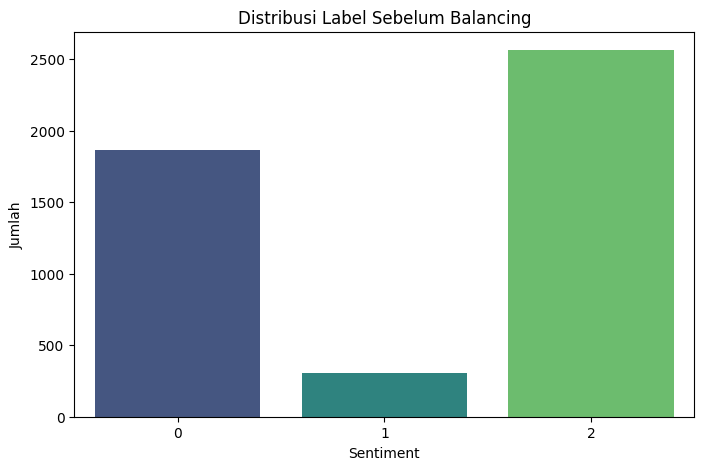

In [ ]:
# Visualisasi sebelum balancing
plt.figure(figsize=(8, 5))
sns.countplot(data=review_df, x="Sentiment", palette="viridis")
plt.title("Distribusi Label Sebelum Balancing")
plt.xlabel("Sentiment")
plt.ylabel("Jumlah")
plt.show()

In [ ]:
# Split Data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    review_df["content"],
    review_df["Sentiment"],
    test_size=0.2,
    random_state=42,
    stratify=review_df["Sentiment"]
)

In [ ]:
# Gabungkan kembali untuk balancing
train_data = pd.DataFrame({"content": X_train, "Sentiment": y_train})

In [ ]:
# Balancing Data dengan Oversampling
oversampler = RandomOverSampler(random_state=42)
X_balanced, y_balanced = oversampler.fit_resample(
    train_data[["content"]], train_data["Sentiment"]
)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [ ]:
# Gabungkan hasil balancing ke dalam dataframe
balanced_data = pd.DataFrame({
    "content": X_balanced["content"],
    "Sentiment": y_balanced
})

<ipython-input-48-6a63d5e3a4de>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=balanced_data, x="Sentiment", palette="viridis")


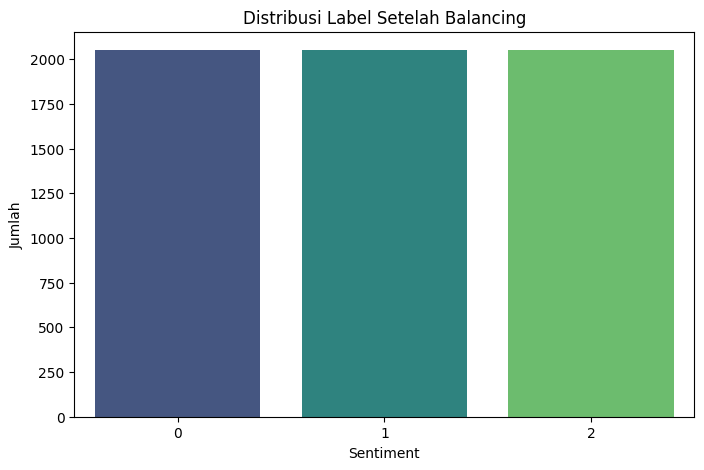

In [ ]:
# Visualisasi setelah balancing
plt.figure(figsize=(8, 5))
sns.countplot(data=balanced_data, x="Sentiment", palette="viridis")
plt.title("Distribusi Label Setelah Balancing")
plt.xlabel("Sentiment")
plt.ylabel("Jumlah")
plt.show()

In [ ]:
# Export balanced data to Excel
balanced_data.to_excel('balanced_data.xlsx', index=False)
files.download('balanced_data.xlsx')

# Export test data to Excel
test_data = pd.DataFrame({'content': X_test, 'Sentiment': y_test})
test_data.to_excel('test_data.xlsx', index=False)
files.download('test_data.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>